In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP500
n=500

#Fitxer que contè en TPM els gens més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensTPM_noversio_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000210082,ENSG00000198712,ENSG00000198899,ENSG00000198938,ENSG00000198804,ENSG00000198886,ENSG00000198763,ENSG00000198888,ENSG00000198727,...,ENSG00000171951,ENSG00000100321,ENSG00000166963,ENSG00000188191,ENSG00000071082,ENSG00000105698,ENSG00000129538,ENSG00000169715,ENSG00000104419,ENSG00000187730
0,Brain - Cortex,56000.0,59480,57190,43790,51600,48610,32840,36570,32050,...,72.76,236.90,257.0,298.7,116.00,131.7,190.40,91.69,170.20,90.78
1,Brain - Cerebellum,32100.0,49380,50440,37730,27340,45150,25620,30180,30980,...,50.60,363.00,149.9,114.6,98.74,229.4,33.49,31.75,24.91,579.30
2,Brain - Cortex,59730.0,62980,66050,48110,75880,63390,32590,45930,31380,...,48.85,165.70,206.9,266.3,112.10,148.2,39.03,148.10,70.65,94.84
3,Brain - Cerebellum,44320.0,51110,50770,43170,60530,54370,28230,36340,31450,...,22.24,361.10,113.5,113.6,81.33,198.6,29.64,56.11,46.13,370.10
4,Brain - Cortex,45870.0,62790,47390,56100,70590,45050,36770,38690,29500,...,95.08,257.40,244.8,394.8,131.50,170.0,100.80,66.25,72.66,186.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,66360.0,60430,54270,52260,54240,42870,26570,36790,26310,...,88.29,286.30,301.3,393.7,123.90,144.5,64.00,83.60,105.90,138.80
2637,Brain - Cerebellum,39830.0,44910,49800,38950,39790,52370,29630,35390,31610,...,20.09,347.00,123.6,110.5,90.56,191.6,43.89,90.62,45.16,399.60
2638,Brain - Cortex,56930.0,47760,49580,42730,51040,50630,38830,40840,30990,...,38.06,122.30,135.7,186.5,148.00,139.6,91.44,160.40,129.90,70.81
2639,Brain - Cerebellum,45720.0,56890,60010,41590,33670,46580,38390,42170,42080,...,18.17,329.00,122.0,112.3,53.56,181.8,15.65,58.31,25.85,295.60


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

23 components expliquen un 95% de la variança. De 500 dimensions a 23


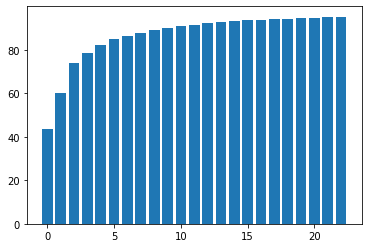

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,3.492351,-8.781149,-4.997180,4.812816,-4.536190,-2.157586,-1.346306,0.140407,-4.937712,-3.219705,...,-2.061554,2.063435,0.206515,2.695522,-0.165381,-1.850941,-3.162590,-0.835520,0.976597,0.520609
1,-16.220311,16.866642,-7.274103,-3.432026,-1.098742,1.355640,-2.117292,-0.534230,-1.215284,0.119634,...,-0.166632,-0.905599,1.592146,0.093032,-0.900683,-1.138434,0.159217,0.178231,1.141854,-0.114472
2,24.061942,2.457511,-9.246848,6.858967,1.132619,0.912149,9.644882,4.179676,3.769999,-2.971179,...,-0.465139,-0.658232,3.096947,-2.869385,-1.725416,0.352378,-0.720189,-1.026751,-0.882880,-0.628481
3,39.147993,3.703943,-10.729115,2.572473,-0.519642,-0.911926,-0.678511,-3.845684,1.521045,-2.361141,...,0.768250,2.200456,-0.850713,0.892675,1.323031,1.388452,3.607283,-2.068557,2.499694,-0.238248
4,12.626358,-3.801172,-6.967489,3.796371,-4.365245,4.174171,-0.908153,-2.381075,-0.284010,-0.328340,...,2.096915,-1.959001,0.196692,-0.217927,0.108528,1.760403,-0.193714,-1.169303,-0.153530,1.231135


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,SMTSD
0,3.492351,-8.781149,-4.997180,4.812816,-4.536190,-2.157586,-1.346306,0.140407,-4.937712,-3.219705,...,2.063435,0.206515,2.695522,-0.165381,-1.850941,-3.162590,-0.835520,0.976597,0.520609,Brain - Hippocampus
1,-16.220311,16.866642,-7.274103,-3.432026,-1.098742,1.355640,-2.117292,-0.534230,-1.215284,0.119634,...,-0.905599,1.592146,0.093032,-0.900683,-1.138434,0.159217,0.178231,1.141854,-0.114472,Brain - Cerebellum
2,24.061942,2.457511,-9.246848,6.858967,1.132619,0.912149,9.644882,4.179676,3.769999,-2.971179,...,-0.658232,3.096947,-2.869385,-1.725416,0.352378,-0.720189,-1.026751,-0.882880,-0.628481,Brain - Frontal Cortex (BA9)
3,39.147993,3.703943,-10.729115,2.572473,-0.519642,-0.911926,-0.678511,-3.845684,1.521045,-2.361141,...,2.200456,-0.850713,0.892675,1.323031,1.388452,3.607283,-2.068557,2.499694,-0.238248,Brain - Nucleus accumbens (basal ganglia)
4,12.626358,-3.801172,-6.967489,3.796371,-4.365245,4.174171,-0.908153,-2.381075,-0.284010,-0.328340,...,-1.959001,0.196692,-0.217927,0.108528,1.760403,-0.193714,-1.169303,-0.153530,1.231135,Brain - Frontal Cortex (BA9)


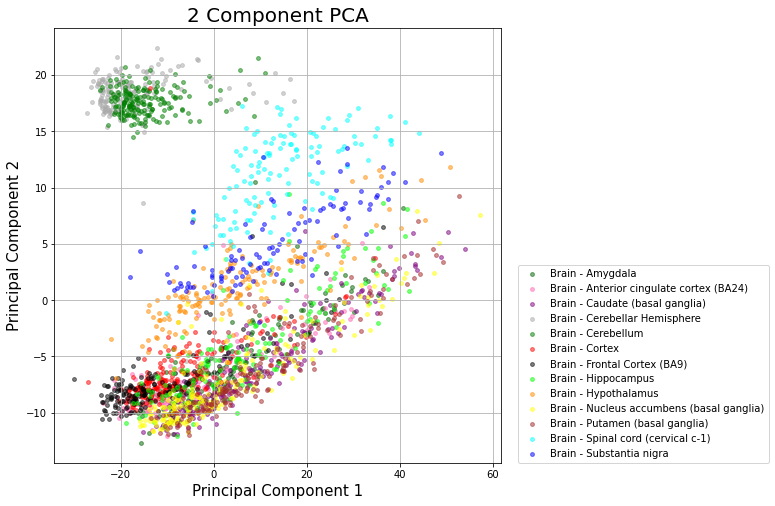

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

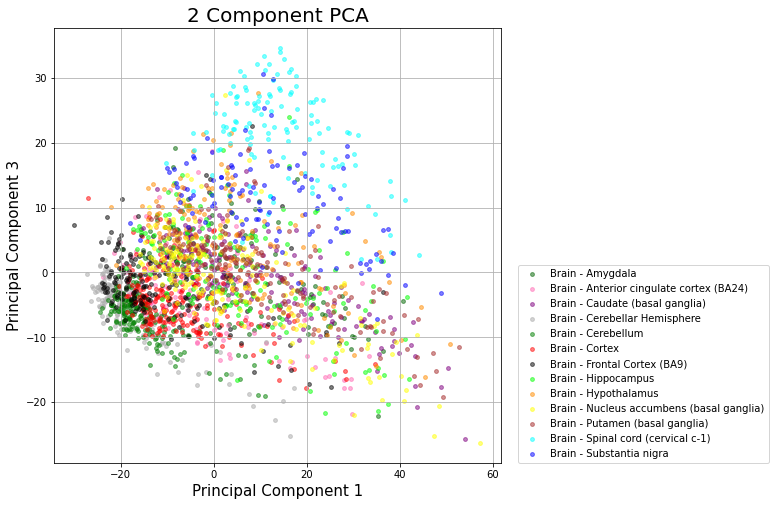

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.001s...
[t-SNE] Computed neighbors for 2112 samples in 0.330s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 4.452805
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.008141
[t-SNE] KL divergence after 1000 iterations: 0.947213


,X,Y,Tipus Teixit
0,-6.931470,-17.986719,Brain - Hippocampus
1,51.775188,8.497809,Brain - Cerebellum
2,-11.438138,0.164865,Brain - Frontal Cortex (BA9)
3,-8.247367,9.283418,Brain - Nucleus accumbens (basal ganglia)
4,-0.762537,-8.236868,Brain - Frontal Cortex (BA9)


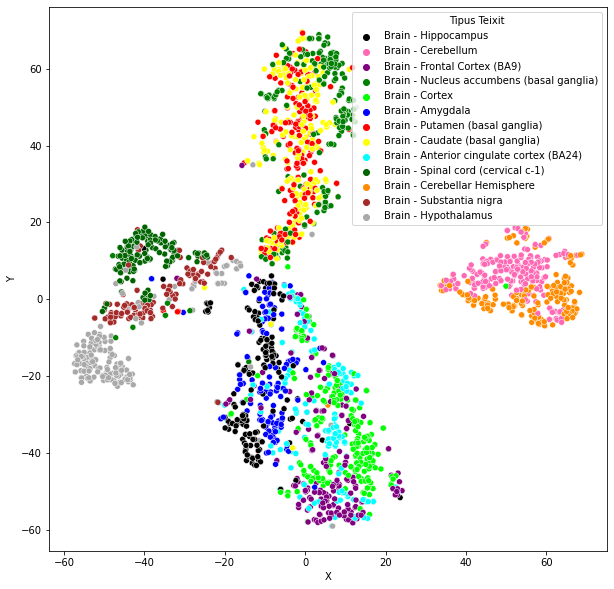

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
11 # Prec. mitjana:  74.66824644549763  desv.:  1.6628250988482287  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
18 # Prec. mitjana:  74.478672985782  desv.:  1.74701725337877  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
39 # Prec. mitjana:  73.38951980684968  desv.:  1.4907013895517616  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
2 # Prec. mitjana:  75.1877850308504  desv.:  2.1067939211553233  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
22 # Prec. mitjana:  74.33649289099526  desv.:  1.4265231628509079  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
14 # Prec. mitjana:  74.57323616203165  desv.:  1.926697118817412  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
10 # Prec. mitjana:  74.66958776714657  desv.:  1.7327376983727543  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
1 # Prec. mitjana:  75.283689528749  desv.:  1.5454325607929527  paràmetres:  {'n_neigh

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,24,1,0,0,0,0,0,9,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,16,0,0,0,1,10,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,35,0,0,0,1,0,0,4,12,0,0
Brain - Cerebellar Hemisphere,0,0,0,43,8,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,6,49,0,0,0,0,0,0,0,0
Brain - Cortex,1,2,0,0,0,38,0,1,0,0,0,0,0
Brain - Frontal Cortex (BA9),3,6,0,0,0,2,22,0,0,0,0,0,0
Brain - Hippocampus,10,1,0,0,0,0,1,27,0,0,0,1,1
Brain - Hypothalamus,0,0,0,1,0,0,0,0,33,1,0,1,3


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
70 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
70 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
70 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
61 # Prec. mitjana:  20.12250737726907  desv.:  0.8385387074112729  paràmetres:  {'C': 0.01, 'gamma': 0.001}
62 # Prec. mitjana:  11.22172046856836  desv.:  0.6736468519156051  paràmetres:  {'C': 0.01, 'gamma': 0.01}
60 # Prec. mitjana:  24.006304211749978  desv.:  1.7938600270620193  paràmetres:  {'C': 0.01, 'gamma': 0.005}
70 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
70 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
70 # Prec. mitjana:  10.038004113386389  desv.:  0.19511

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,32,0,0,0,0,0,0,2,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,25,0,0,0,0,2,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,42,0,0,0,1,0,0,2,7,0,0
Brain - Cerebellar Hemisphere,0,0,0,50,0,1,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,2,53,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,39,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),0,2,0,0,0,0,31,0,0,0,0,0,0
Brain - Hippocampus,8,1,0,0,0,0,0,32,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,0,33,2,0,0,3


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
127 # Prec. mitjana:  50.236296163820086  desv.:  1.3774037643985346  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
132 # Prec. mitjana:  50.14173298757042  desv.:  1.4145695093581394  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
127 # Prec. mitjana:  50.236296163820086  desv.:  1.3774037643985346  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
127 # Prec. mitjana:  50.236296163820086  desv.:  1.471997572991693  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
127 # Prec. mitjana:  50.236296163820086  desv.:  1.471997572991693  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
127 # Prec. mitjana:  50.236296163820086  desv.:  1.471997572991693  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  39.489180005365284  desv.:  1.4212131369639511  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  33.995797192166684  desv.:  0.97198681994

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,18,9,0,0,0,2,0,5,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),2,21,0,0,0,1,4,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,31,0,0,0,1,0,0,5,15,0,0
Brain - Cerebellar Hemisphere,0,0,0,42,9,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,1,12,42,0,0,0,0,0,0,0,0
Brain - Cortex,0,6,0,0,0,33,3,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),1,8,1,0,0,5,18,0,0,0,0,0,0
Brain - Hippocampus,13,4,2,0,0,2,2,16,0,0,0,2,0
Brain - Hypothalamus,1,0,0,0,0,0,0,1,33,1,1,1,1


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  72.63167307520344  desv.:  4.237917512968852  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
52 # Prec. mitjana:  76.98761513010821  desv.:  1.696932533518039  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
54 # Prec. mitjana:  76.93999821157112  desv.:  2.6970159558392175  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
53 # Prec. mitjana:  76.98739157650004  desv.:  2.5107600225391105  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
55 # Prec. mitjana:  76.32500223553608  desv.:  2.7433972055959583  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
51 # Prec. mitjana:  77.93525887507823  desv.:  1.924116178305107  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
65 # Prec. mitjana:  74.00764553339891  desv.:  2.6124759015467776  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
50 # Prec. mitjana:  78.0309398193687  desv.:  2.524906886864318  paràmetres:  {'max_depth': 7, 'n_estimators'

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,27,0,0,0,0,0,0,7,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,19,0,0,0,0,8,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,43,0,0,0,1,0,0,3,5,0,0
Brain - Cerebellar Hemisphere,0,0,0,44,7,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,3,52,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,0,0,39,2,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),1,3,0,0,0,3,25,0,0,0,1,0,0
Brain - Hippocampus,6,2,0,0,0,0,2,28,0,1,0,1,1
Brain - Hypothalamus,0,0,1,0,0,0,0,1,33,2,0,0,2


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 75.28%
Model kNN, Accuracy de test és: 77.50%
##################################################
Model Svm Accuracy: 88.49%
Model Svm, Accuracy de test és: 90.36%
##################################################
Model Arbre de Decisió: 69.56%
Model Arbre de Decisió, Accuracy de test és: 69.38%
##################################################
Model Random Forest: 82.39%
Model Random Forest, Accuracy de test és: 84.12%
